In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [4]:
# Load the datasets
restaurants_path = 'resturants.csv'
sales_path = 'sales.csv'
items_path = 'items.csv'

restaurants_data = pd.read_csv(restaurants_path)
sales_data = pd.read_csv(sales_path)
items_data = pd.read_csv(items_path)


In [5]:
# Merge the datasets
merged_data = sales_data.merge(items_data, left_on='item_id', right_on='id', suffixes=('_sales', '_item'))
final_data = merged_data.merge(restaurants_data, left_on='store_id', right_on='id', suffixes=('_item', '_store'))
final_data = final_data[['date', 'item_id', 'price', 'item_count', 'name_item', 'kcal', 'store_id', 'name_store']]
final_data.columns = ['date', 'item_id', 'price', 'item_count', 'item_name', 'kcal', 'store_id', 'store_name']

# Ensure 'date' is in datetime format, handling errors
final_data['date'] = pd.to_datetime(final_data['date'], errors='coerce')

# Drop rows with invalid dates
final_data = final_data.dropna(subset=['date'])


# Display the merged dataset structure and sample rows
print("\nFinal Merged Dataset:")
print(f"Shape: {final_data.shape}")



Final Merged Dataset:
Shape: (109600, 8)


In [6]:
final_data


,date,item_id,price,item_count,item_name,kcal,store_id,store_name
0,2019-01-01,3,29.22,2.0,Sweet Fruity Cake,931,1,Bob's Diner
1,2019-01-01,4,26.42,22.0,Amazing Steak Dinner with Rolls,763,1,Bob's Diner
2,2019-01-01,12,4.87,7.0,Fantastic Sweet Cola,478,1,Bob's Diner
3,2019-01-01,13,4.18,12.0,Sweet Frozen Soft Drink,490,1,Bob's Diner
4,2019-01-01,16,3.21,136.0,Frozen Milky Smoothy,284,1,Bob's Diner
...,...,...,...,...,...,...,...,...
109595,2021-12-31,96,21.93,0.0,Blue Ribbon Fish with Bread Lunch,708,5,Corner Cafe
109596,2021-12-31,97,28.65,0.0,Original Fruity Cod with Bread and Vegetables ...,744,4,Fou Cher
109597,2021-12-31,98,5.00,0.0,Original Sweet Milky Soft Drink,579,2,Beachfront Bar
109598,2021-12-31,99,5.32,0.0,Frozen Tomato Soft Drink,423,4,Fou Cher


In [11]:
final_data['sales']=final_data['price']*final_data['item_count']
final_data


,date,item_id,price,item_count,item_name,kcal,store_id,store_name,sales
0,2019-01-01,3,29.22,2.0,Sweet Fruity Cake,931,1,Bob's Diner,58.44
1,2019-01-01,4,26.42,22.0,Amazing Steak Dinner with Rolls,763,1,Bob's Diner,581.24
2,2019-01-01,12,4.87,7.0,Fantastic Sweet Cola,478,1,Bob's Diner,34.09
3,2019-01-01,13,4.18,12.0,Sweet Frozen Soft Drink,490,1,Bob's Diner,50.16
4,2019-01-01,16,3.21,136.0,Frozen Milky Smoothy,284,1,Bob's Diner,436.56
...,...,...,...,...,...,...,...,...,...
109595,2021-12-31,96,21.93,0.0,Blue Ribbon Fish with Bread Lunch,708,5,Corner Cafe,0.00
109596,2021-12-31,97,28.65,0.0,Original Fruity Cod with Bread and Vegetables ...,744,4,Fou Cher,0.00
109597,2021-12-31,98,5.00,0.0,Original Sweet Milky Soft Drink,579,2,Beachfront Bar,0.00
109598,2021-12-31,99,5.32,0.0,Frozen Tomato Soft Drink,423,4,Fou Cher,0.00


In [15]:
# Aggregate data by date for modeling
daily_sales = final_data.groupby('date').agg({
    'sales': 'sum'
}).reset_index()


In [16]:
daily_sales


,date,sales
0,2019-01-01,4023.00
1,2019-01-02,3074.69
2,2019-01-03,4062.71
3,2019-01-04,5006.81
4,2019-01-05,4927.53
...,...,...
1091,2021-12-27,1867.71
1092,2021-12-28,3426.50
1093,2021-12-29,3715.39
1094,2021-12-30,5266.27


In [17]:
daily_sales=daily_sales.set_index('date')
daily_sales


,sales
date,
2019-01-01,4023.00
2019-01-02,3074.69
2019-01-03,4062.71
2019-01-04,5006.81
2019-01-05,4927.53
...,...
2021-12-27,1867.71
2021-12-28,3426.50
2021-12-29,3715.39


In [18]:
#d.Develop another model using the entire series for training, and use it to forecast for the next three months


In [19]:
#Prophet model for time series forecast
from prophet import Prophet
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


In [21]:
daily_sales=daily_sales.reset_index()
daily_sales


,date,sales
0,2019-01-01,4023.00
1,2019-01-02,3074.69
2,2019-01-03,4062.71
3,2019-01-04,5006.81
4,2019-01-05,4927.53
...,...,...
1091,2021-12-27,1867.71
1092,2021-12-28,3426.50
1093,2021-12-29,3715.39
1094,2021-12-30,5266.27


In [22]:
daily_sales.columns = ['ds', 'y']
daily_sales


,ds,y
0,2019-01-01,4023.00
1,2019-01-02,3074.69
2,2019-01-03,4062.71
3,2019-01-04,5006.81
4,2019-01-05,4927.53
...,...,...
1091,2021-12-27,1867.71
1092,2021-12-28,3426.50
1093,2021-12-29,3715.39
1094,2021-12-30,5266.27


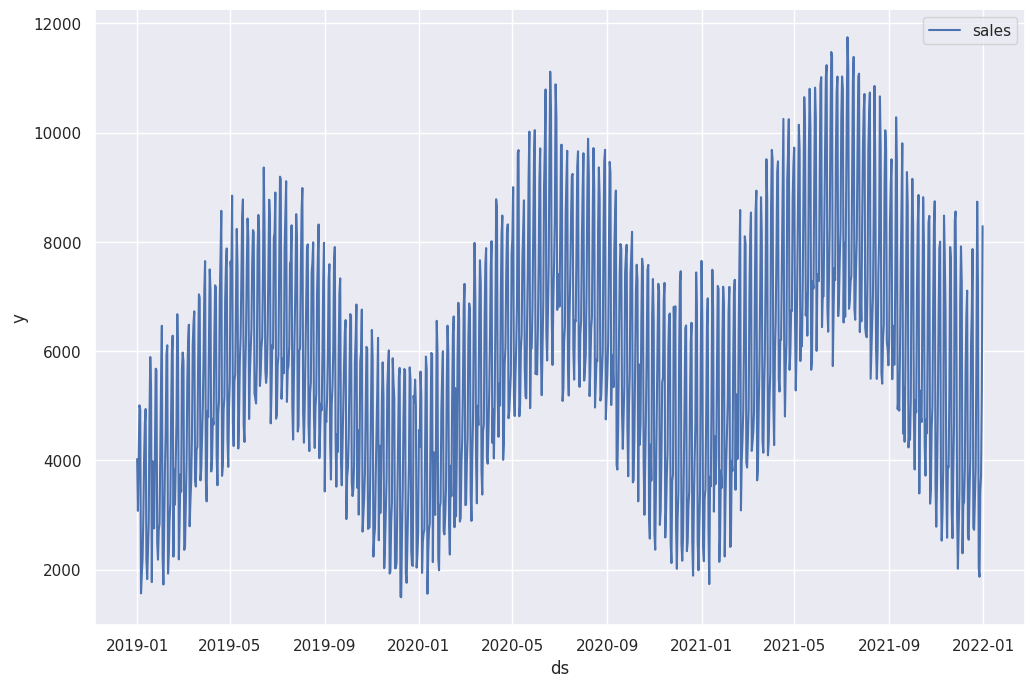

In [23]:
#Visualize data using seaborn
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=daily_sales['ds'], y=daily_sales['y'])
plt.legend(['sales'])


In [24]:
#Add seasonality and holiday effect
model = Prophet(interval_width=0.99,
                yearly_seasonality=True,
                weekly_seasonality=True,
                    daily_seasonality=True)

model.add_country_holidays('US')
#Fit the model on the training dataset
model.fit(daily_sales)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpcczfjphf/s5t2t5_u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcczfjphf/qnuazvi4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76787', 'data', 'file=/tmp/tmpcczfjphf/s5t2t5_u.json', 'init=/tmp/tmpcczfjphf/qnuazvi4.json', 'output', 'file=/tmp/tmpcczfjphf/prophet_modelysjxbzjp/prophet_model-20241226190318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:03:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:03:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


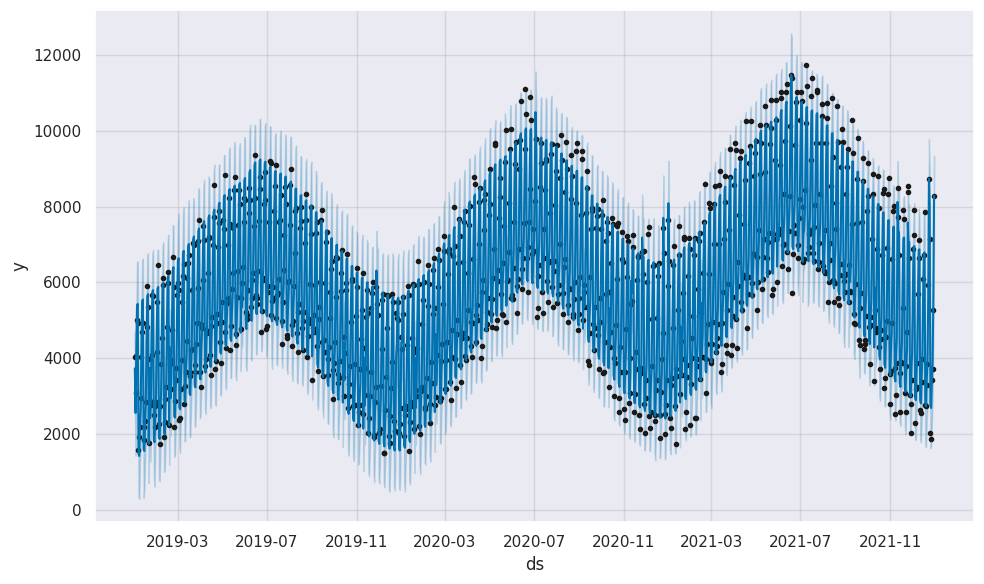

In [25]:
#Make prediction
forecast = model.predict(daily_sales)

#Visualize the forecast
model.plot(forecast); # Add semi-colon to remove the duplicated chart


In [26]:
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,4245.129970,2725.098121,4698.720343,4245.129970,4245.129970,0.0,0.0,0.0,0.0,...,-1121.794637,-1121.794637,-1121.794637,-1958.415713,-1958.415713,-1958.415713,0.0,0.0,0.0,3728.999877
1,2019-01-02,4243.921415,1422.190094,3655.718721,4243.921415,4243.921415,0.0,0.0,0.0,0.0,...,-646.853365,-646.853365,-646.853365,-1951.193728,-1951.193728,-1951.193728,0.0,0.0,0.0,2553.213631
2,2019-01-03,4242.712860,3111.362443,5237.709667,4242.712860,4242.712860,0.0,0.0,0.0,0.0,...,1001.897284,1001.897284,1001.897284,-1942.179636,-1942.179636,-1942.179636,0.0,0.0,0.0,4209.769818
3,2019-01-04,4241.504305,4222.532564,6551.738880,4241.504305,4241.504305,0.0,0.0,0.0,0.0,...,2165.056167,2165.056167,2165.056167,-1931.403537,-1931.403537,-1931.403537,0.0,0.0,0.0,5382.496245
4,2019-01-05,4240.295750,4256.233594,6530.139824,4240.295750,4240.295750,0.0,0.0,0.0,0.0,...,2203.244146,2203.244146,2203.244146,-1918.922541,-1918.922541,-1918.922541,0.0,0.0,0.0,5431.956665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,5583.290019,1663.901640,3798.610375,5583.290019,5583.290019,0.0,0.0,0.0,0.0,...,-1838.831985,-1838.831985,-1838.831985,-1968.857991,-1968.857991,-1968.857991,0.0,0.0,0.0,2682.939354
1092,2021-12-28,5582.613442,2306.275518,4397.356975,5582.613442,5582.613442,0.0,0.0,0.0,0.0,...,-1121.794637,-1121.794637,-1121.794637,-1969.775403,-1969.775403,-1969.775403,0.0,0.0,0.0,3398.382712
1093,2021-12-29,5581.936864,2797.877092,4920.051509,5581.936864,5581.936864,0.0,0.0,0.0,0.0,...,-646.853365,-646.853365,-646.853365,-1969.099350,-1969.099350,-1969.099350,0.0,0.0,0.0,3873.323459
1094,2021-12-30,5581.260286,4449.354063,6591.006079,5581.260286,5581.260286,0.0,0.0,0.0,0.0,...,1001.897284,1001.897284,1001.897284,-1966.746376,-1966.746376,-1966.746376,0.0,0.0,0.0,5523.750504


In [27]:
#Merge actual and predicted values
performance = pd.merge(daily_sales, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
performance


,ds,y,yhat,yhat_lower,yhat_upper
0,2019-01-01,4023.00,3728.999877,2725.098121,4698.720343
1,2019-01-02,3074.69,2553.213631,1422.190094,3655.718721
2,2019-01-03,4062.71,4209.769818,3111.362443,5237.709667
3,2019-01-04,5006.81,5382.496245,4222.532564,6551.738880
4,2019-01-05,4927.53,5431.956665,4256.233594,6530.139824
...,...,...,...,...,...
1091,2021-12-27,1867.71,2682.939354,1663.901640,3798.610375
1092,2021-12-28,3426.50,3398.382712,2306.275518,4397.356975
1093,2021-12-29,3715.39,3873.323459,2797.877092,4920.051509
1094,2021-12-30,5266.27,5523.750504,4449.354063,6591.006079


In [28]:
#Check MAE value
performance_MAE = mean_absolute_error(performance['y'], performance['yhat'])
print(f'The MAE for the model is {performance_MAE}')

#Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')


The MAE for the model is 337.6341519573967
The MAPE for the model is 0.06741287552897238


In [29]:
1-performance_MAPE


0.9325871244710277

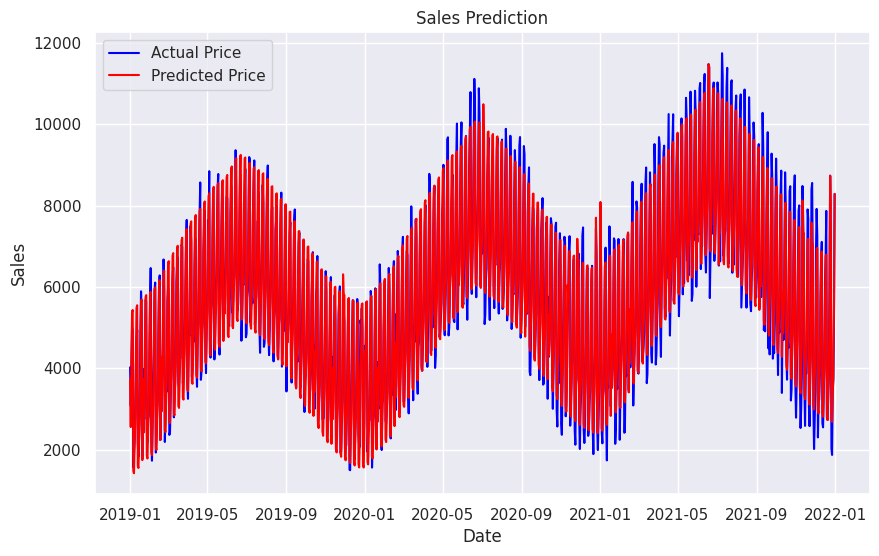

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(performance['ds'], performance['y'], label='Actual Price', color='blue')
plt.plot(performance['ds'], performance['yhat'], label='Predicted Price', color='red')
plt.title('Sales Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [31]:
#Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)

#Check the number of anomalies
performance['anomaly'].value_counts()


,count
anomaly,
0,1087
1,9


In [32]:
#Take a look at the anomalies
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
anomalies


,ds,y,yhat,yhat_lower,yhat_upper,anomaly
199,2019-07-19,7652.91,8843.093568,7714.771998,9898.421183,1
358,2019-12-25,5179.58,4041.282774,3034.899182,5119.122480,1
535,2020-06-19,11116.13,10018.288749,8894.613434,10978.770202,1
901,2021-06-20,5726.40,6948.747403,5953.603168,8066.336922,1
920,2021-07-09,11746.77,10606.442318,9572.890710,11683.636945,1
983,2021-09-10,10281.45,9188.458688,8191.762802,10198.491835,1
994,2021-09-21,4339.59,5483.690841,4437.377450,6571.954610,1
1043,2021-11-09,3019.04,4080.830333,3044.750836,5174.783025,1
1060,2021-11-26,8556.33,7038.785776,5979.336041,8065.639086,1


<Axes: xlabel='ds', ylabel='y'>

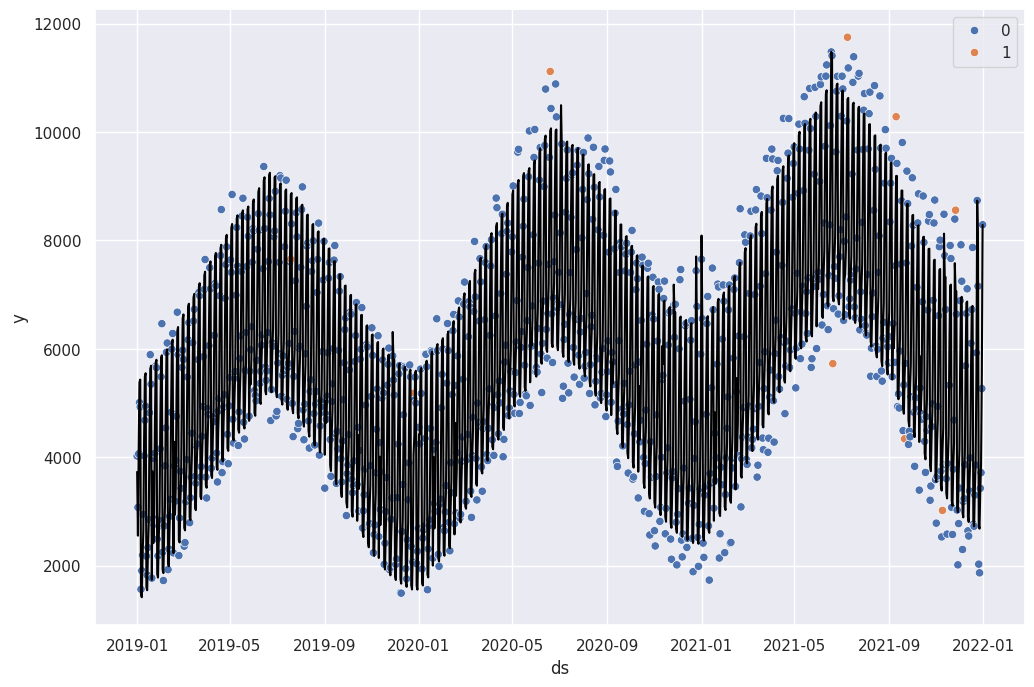

In [33]:
#Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')


In [34]:
#Create a dataframe to hold predictions for the next 90 days
future_90_days = model.make_future_dataframe(periods=90)
future_90_days


,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
1181,2022-03-27
1182,2022-03-28
1183,2022-03-29
1184,2022-03-30


In [35]:
#Make future predictions
forecast_90_days = model.predict(future_90_days)
forecast_90_days


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,4245.129970,2633.068583,4836.492541,4245.129970,4245.129970,0.0,0.0,0.0,0.0,...,-1121.794637,-1121.794637,-1121.794637,-1958.415713,-1958.415713,-1958.415713,0.0,0.0,0.0,3728.999877
1,2019-01-02,4243.921415,1478.215856,3640.526894,4243.921415,4243.921415,0.0,0.0,0.0,0.0,...,-646.853365,-646.853365,-646.853365,-1951.193728,-1951.193728,-1951.193728,0.0,0.0,0.0,2553.213631
2,2019-01-03,4242.712860,3128.332422,5240.474445,4242.712860,4242.712860,0.0,0.0,0.0,0.0,...,1001.897284,1001.897284,1001.897284,-1942.179636,-1942.179636,-1942.179636,0.0,0.0,0.0,4209.769818
3,2019-01-04,4241.504305,4337.637888,6384.330108,4241.504305,4241.504305,0.0,0.0,0.0,0.0,...,2165.056167,2165.056167,2165.056167,-1931.403537,-1931.403537,-1931.403537,0.0,0.0,0.0,5382.496245
4,2019-01-05,4240.295750,4417.868531,6474.669620,4240.295750,4240.295750,0.0,0.0,0.0,0.0,...,2203.244146,2203.244146,2203.244146,-1918.922541,-1918.922541,-1918.922541,0.0,0.0,0.0,5431.956665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,2022-03-27,5522.398020,3739.265434,5776.007071,5412.638626,5635.668150,0.0,0.0,0.0,0.0,...,-1762.717610,-1762.717610,-1762.717610,85.984354,85.984354,85.984354,0.0,0.0,0.0,4753.004073
1182,2022-03-28,5521.721442,3653.453154,5682.854647,5410.262536,5636.614302,0.0,0.0,0.0,0.0,...,-1838.831985,-1838.831985,-1838.831985,117.461580,117.461580,117.461580,0.0,0.0,0.0,4707.690347
1183,2022-03-29,5521.044864,4326.205596,6535.308871,5407.844809,5637.560667,0.0,0.0,0.0,0.0,...,-1121.794637,-1121.794637,-1121.794637,148.689919,148.689919,148.689919,0.0,0.0,0.0,5455.279456
1184,2022-03-30,5520.368286,4894.321754,7066.867959,5405.199454,5638.507245,0.0,0.0,0.0,0.0,...,-646.853365,-646.853365,-646.853365,179.547895,179.547895,179.547895,0.0,0.0,0.0,5960.402126


In [36]:
forecast_90_days['yhat'].tail(90)


,yhat
1096,8390.452672
1097,2774.744751
1098,2707.412270
1099,3434.981770
1100,3922.141624
...,...
1181,4753.004073
1182,4707.690347
1183,5455.279456
1184,5960.402126


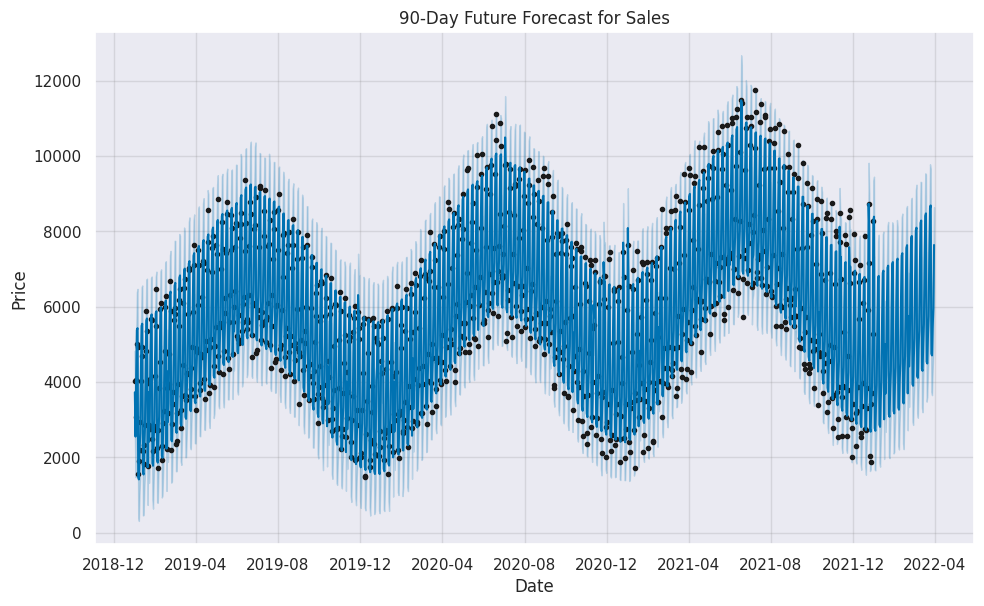

In [37]:
#Visualize the 90-day future forecast together with the current data
model.plot(forecast_90_days)
plt.title('90-Day Future Forecast for Sales')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [38]:
#Display the forecasted prices for the next 5 days
future_90_days_results = forecast_90_days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(90)
print(future_90_days_results)


             ds         yhat   yhat_lower   yhat_upper
1096 2022-01-01  8390.452672  7340.851179  9452.780353
1097 2022-01-02  2774.744751  1677.827598  3907.569465
1098 2022-01-03  2707.412270  1656.077289  3701.245059
1099 2022-01-04  3434.981770  2445.882490  4538.384778
1100 2022-01-05  3922.141624  2841.699415  4921.037905
...         ...          ...          ...          ...
1181 2022-03-27  4753.004073  3739.265434  5776.007071
1182 2022-03-28  4707.690347  3653.453154  5682.854647
1183 2022-03-29  5455.279456  4326.205596  6535.308871
1184 2022-03-30  5960.402126  4894.321754  7066.867959
1185 2022-03-31  7638.849546  6555.104371  8643.831930

[90 rows x 4 columns]
